# <center> INTERACTIVE PLOTS

**Import packages and data**

In [1]:
import os
os.getcwd()
os.chdir(r'C:\\Users\\melanie.vercaempt\\Documents\\Code\\train-keyrus-academy-python\\data-viz')

In [2]:
# libraries
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import datetime as datetime

#iris dataset
iris = pd.read_csv('data/iris.csv')

#cars dataset + transformation
cars = pd.read_csv('data/auto-mpg.csv')
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars = cars.dropna(axis='rows')
countries = pd.DataFrame({'origin':[1,2,3],
                          'country': ['USA', 'Europe', 'Japan']})
cars = cars.merge(countries, on='origin')
cars = cars.drop('origin', axis='columns')

#titanic dataset (not used here)
#titanic = pd.read_csv('data/titanic.csv')

#tips dataset
tips = pd.read_csv('data/tips.csv')
tips = tips.drop(['Unnamed: 0'], axis='columns')

#house dataset + data transformation
houses = pd.read_csv('data/melb_data.csv')
houses.Date = houses['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
houses['Month_Year'] = houses['Date'].dt.to_period('M')
houses = houses.drop(['Rooms','Method','SellerG','Distance','Bedroom2','Bathroom', 'Car', 'BuildingArea','CouncilArea','Lattitude','Longtitude','Propertycount'], axis='columns')

#weather data + data transformation
weather = pd.read_csv('data/weatherHistory.csv')
weather = weather.drop(['Apparent Temperature (C)','Humidity','Wind Bearing (degrees)', 'Visibility (km)','Loud Cover'], axis = 'columns')
weather['Formatted Date'] = weather['Formatted Date'].apply(lambda x: datetime.datetime.strptime(str(x)[:19], '%Y-%m-%d %H:%M:%S'))

#Life expectancy data
life = pd.read_csv('data/LifeExpectancyEU.csv')

# **1. PLOTLY**

Plotly's Python graphing library makes interactive, publication-quality graphs online.


Description:
- Interactive
- Online/offline visualization library with a Python API integration
- Can be easily embedded into websites

Strengths and Weaknesses:
- Strengths
    - Good default style characteristics
    - Hover tool capabilities
    - Multi-language support
    - 3D support
    - Animation capability
    - Geographical visualisation
- Weaknesses
    - many Plotly tools (next one is Plotly Express)
    - out-of-date documentation
    - Some features are paid
    
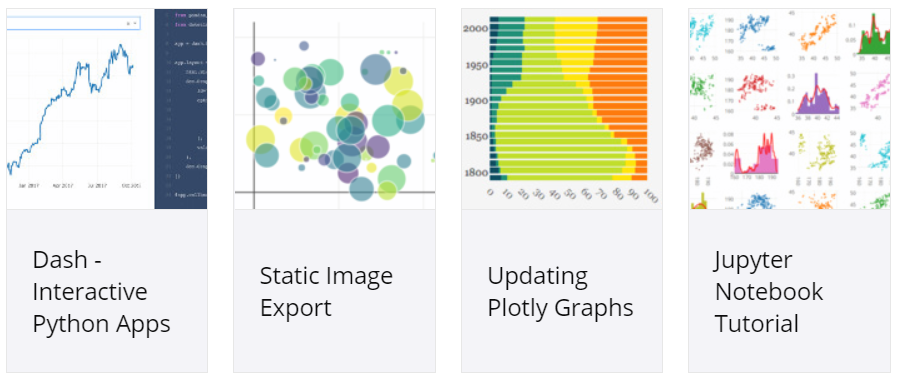

Doc: https://plot.ly/python/

In [3]:
# imports
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## **1.1 Basic plots**

Creating traces

    x = x axis
    y = y axis
    mode = type of plot like marker, line or line + markers
    name = name of the plots
    marker = marker is used with dictionary.
    color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    text = The hover text (hover is curser)

data = is a list that we add traces into it
layout = it is dictionary.

    title = title of layout
    x axis = it is dictionary
        title = label of x axis
        ticklen = length of x axis ticks
        zeroline = showing zero line or not

fig = it includes data and layout
iplot() = plots the figure(fig) that is created by data and layout

#### **1.1.1 Scatter Plot**

In [5]:
# PLOTLY - Scatter plot
trace = go.Scatter(x=iris.petalLength,
                   y=iris.sepalLength,
                   mode = 'markers')
data = [trace]

py.iplot(data)

# Instead of showing the plot, it saves it into an HTML page
#py.plot(data)

In [6]:
# PLOTLY - Scatter plot by group

# Not working on 3.8.0... Do the following and then restart
# import plotly
# plotly.__version__
# !pip uninstall plotly -y
# !pip install plotly==3.7.0 --user

trace = dict(
    type = 'scatter',
    mode = 'markers',
    x = iris['petalLength'],
    y = iris['sepalLength'],
    transforms = [
        dict(type = 'groupby',
             groups = iris['species'])])
data=[trace]

py.iplot({'data': data}, validate=False)

In [6]:
# PLOTLY - Scatter plot by group (with pandas)
fig = go.Figure()
for species, group in iris.groupby('species'):
    fig.add_scatter(x=group.petalLength, y=group.sepalLength, name=species, mode='markers')

py.plot(fig)

'temp-plot.html'

In [7]:
# PLOTLY - Scatter plot by group with facets
fig = ff.create_facet_grid(df = iris,
                           x='petalLength',
                           y='sepalLength',
                           facet_col='species',
                           color_name='species',
                           width = 900,
                           height = 400)
py.iplot(fig)

In [8]:
# PLOTLY - Aesthetics - Scatter plot
trace = go.Scatter(x=iris.petalLength,
                   y=iris.sepalLength,
                   mode = 'markers')
data = [trace]


layout = dict(title = '<b>Iris</b><br>Petal lengths (cm) vs. Sepal lengths (cm)',
              yaxis = dict(title='Sepal length (cm)',
                           titlefont=dict(family='Courier New, monospace',
                                          size=18,
                                          color='#7f7f7f')),
              xaxis = dict(title='Sepal length (cm)',
                           titlefont=dict(family='Courier New, monospace',
                                          size=18,
                                          color='#7f7f7f')))

py.iplot({'data': data, 'layout': layout}, validate=False)

In [9]:
# PLOTLY - Scatter plot by group - aggregated
trace = dict(type = 'scatter',
             mode = 'markers',
             x = iris['petalLength'],
             y = iris['sepalLength'],
             text = iris['species'],
             opacity = 0.8,
             marker = dict(size = 10*iris['petalWidth']*iris['sepalWidth'],
                           sizemode = 'area',
                           sizeref = 10),
             transforms = [dict(type = 'aggregate',
                                groups = iris['species'],
                                aggregations = [
                                    dict(target = 'x', func = 'avg'),
                                    dict(target = 'y', func = 'avg'),
                                    dict(target = 'marker.size', func = 'sum')])])
data = [trace]

layout = dict(title = '<b>Iris</b><br>Petal lengths (cm) vs. Sepal lengths (cm)')


py.iplot({'data': data, 'layout': layout}, validate=False)

In [10]:
# PLOTLY - Interactions and superpositions
trace_0 = dict(type = 'scatter',
             mode = 'markers',
             marker = dict(size = 10*iris['sepalLength'],
                           sizemode = 'area',
                           sizeref = 10),
             x = iris['petalLength'],
             y = iris['sepalLength'],
             transforms = [dict(type = 'groupby',
                                groups = iris['species']),
                           dict(type = 'aggregate',
                                groups = iris['species'],
                                aggregations = [dict(target = 'x', func = 'avg'),
                                                dict(target = 'y', func = 'avg'),
                                                dict(target = 'marker.size', func = 'sum')])])
trace_1 = dict(type = 'scatter',
               mode = 'markers',
               x = iris['petalLength'],
               y = iris['sepalLength'],
               transforms = [dict(type = 'filter',
                                  target = iris['species'],
                                  orientation = '=',
                                  value = iris['species'].unique()[0])])
trace_2 = dict(type = 'scatter',
               mode = 'markers',
               x = iris['petalLength'],
               y = iris['sepalLength'],
               transforms = [dict(type = 'filter',
                                  target = iris['species'],
                                  orientation = '=',
                                  value = iris['species'].unique()[1])])
trace_3 = dict(type = 'scatter',
               mode = 'markers',
               x = iris['petalLength'],
               y = iris['sepalLength'],
               transforms = [dict(type = 'filter',
                                  target = iris['species'],
                                  orientation = '=',
                                  value = iris['species'].unique()[2])])
data = [trace_0, trace_1, trace_2, trace_3]

layout = dict(title = '<b>Iris</b><br>Petal lengths (cm) vs. Sepal lengths (cm)',
              yaxis = dict(title='Sepal length (cm)',
                           titlefont=dict(family='Courier New, monospace',
                                          size=18,
                                          color='#7f7f7f')),
              xaxis = dict(title='Sepal length (cm)',
                           titlefont=dict(family='Courier New, monospace',
                                          size=18,
                                          color='#7f7f7f')),
              updatemenus = list([dict(buttons=list([dict(args=[{'visible': [True, True, True, True]}],
                                                          label='All',
                                                          method='update'),
                                                     dict(args=[{'visible': [False, True, False, False]}],
                                                          label='First species',
                                                          method='update'),
                                                     dict(args=[{'visible': [False, False, True, False]}],
                                                          label='Second species',
                                                          method='update'),
                                                     dict(args=[{'visible': [False, False, False, True]}],
                                                          label='Third species',
                                                          method='update')]),
                                       direction = 'down')]))

py.iplot({'data': data, 'layout': layout}, validate=False)

#### **1.1.2 Bar chart**

In [11]:
data = [go.Bar(
   x = tips['sex'],
   y = tips['tip']
)]

fig = go.Figure(data=data)
py.iplot(fig)

In [12]:
days = tips.groupby('day').mean().index
total_bill = tips.groupby('day').mean().total_bill
tip = tips.groupby('day').mean().tip


trace1 = go.Bar(
   x = days,
   y = total_bill,
   name = 'Total Bill'
)
trace2 = go.Bar(
   x = days,
   y = tip,
   name = 'Tip'
)

data = [trace1, trace2]
layout = go.Layout(barmode = 'group', title = 'Total bill and tip per day')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## **1.2 Advanced Plots**

#### **1.2.1 3D Plot and Heatmap**

In [16]:
# PLOTLY - Interactions - 3D plots
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict(x=1, y=1, z=0.7),
        aspectmode = 'manual'
    )
)

updatemenus=list([
    dict(
        buttons=list([   
            dict(
                args=['type', 'surface'],
                label='3D Surface',
                method='restyle'
            ),
            dict(
                args=['type', 'heatmap'],
                label='Heatmap',
                method='restyle'
            )             
        ]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.1,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    ),
])

annotations = list([
    dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations

fig = dict(data=data, layout=layout)
py.plot(fig, filename='cmocean-picker-one-dropdown.html')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

## **1.3 Exercises**

**Exercise 1**

Build a scatter plot of displacement vs weight of the cars dataset. [cars]

In [9]:
trace = dict(
    type = 'scatter',
    mode = 'markers',
    x = cars['displacement'],
    y = cars['weight'])

data = [trace]
py.iplot(dict(data=data), validate=False)

**Exercise 2**

On top of the previous graph, plot the same points but aggregated by average. [cars]

In [10]:
trace_0 = dict(
    type = 'scatter',
    mode = 'markers',
    x = cars['displacement'],
    y = cars['weight'],
    transforms = [
        dict(type = 'groupby',
             groups = cars['cylinders'])])
trace_1 = dict(
    type = 'scatter',
    mode = 'markers',
    marker = dict(size = cars['mpg'],
                  sizemode = 'area',
                  sizeref = 7),
    x = cars['displacement'],
    y = cars['weight'],
    transforms = [
        dict(type = 'groupby',
             groups = cars['cylinders']),
        dict(type = 'aggregate',
             groups = cars['cylinders'],
             aggregations = [
                 dict(target = 'x', func = 'avg'),
                 dict(target = 'y', func = 'avg'),
                 dict(target = 'marker.size', func = 'sum')])])
data = [trace_0, trace_1]
py.iplot(dict(data=data), validate=False)

**Exercise 3**

Make a linechart of the average houseprice per month and year. [houses]

# **2. PLOTLY EXPRESS**


Description:
- high-level Python visualization library
- Wrapper for Plotly.py
- Inspired by Seaborn and ggplot2
- Compatible with Dash and Plotly

Strengths and Weaknesses:
- Strengths
    - Intuitive
- Weaknesses
    - Early stage

Doc: https://www.plotly.express/

In [18]:
# imports
import plotly_express as px

## **2.1 Basic Plots**

#### **2.1.1 Scatter plot**

In [19]:
# PLOTLY EXPRESS - Scatter plot
px.scatter(iris, x="petalLength", y="sepalLength")

In [13]:
# PLOTLY EXPRESS - Scatter plot
px.scatter(iris, x="petalLength", y="sepalLength", color='species', 
           title = 'Petal vs Sepal lengths (cm)', 
           labels = dict(sepalLength='Sepal Length (cm)',
                         petalLength='Petal Length (cm)'))

In [14]:
# PLOTLY EXPRESS - Scatter plot
px.scatter(iris, x="petalLength", y="sepalLength", facet_col='species', color='species')

#### **2.1.2 Barchart**

In [15]:
fig = px.bar(tips, x="sex", y="total_bill", color="smoker", barmode="group")
fig.show()

In [16]:
fig = px.bar(tips,               #dataframe
             x = "sex",          #x-values column
             y = "total_bill",   #y-values column
             color = "smoker",   #column shown by color
             barmode = "group",  #separate filter (smoker)
             facet_row = "time", #name of grid row
             facet_col = "day",  #name of grid column
             category_orders= {"day": ["Thur", "Fri", "Sat", "Sun"],
                               "time": ["Lunch", "Dinner"]}
                                 #grid arrangement
             )
fig.show()

#### **2.1.3 Line chart**

In [17]:
gapminder_canada = px.data.gapminder().query("country=='Canada'")
fig = px.line(gapminder_canada, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()

## **2.2 Advanced Plots**

#### **2.2.1 Histogram**

In [18]:
fig = px.histogram(tips,                     #dataframe
                   x = 'total_bill',         #x-values column
                   color = "sex",            #column shown by color
                   marginal = "box",         #plot type (eg box,rug) 
                   hover_data = tips.columns #extra info in hover
                   )
fig.show()

#### **2.2.2 Other plots**

In [19]:
fig = px.scatter(iris, x="sepalWidth", y="sepalLength", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [20]:
fig = px.bar(gapminder_canada,                     #dataframe
             x = 'year',                           #x-values column
             y = 'pop',                            #y-values column
             hover_data = ['lifeExp', 'gdpPercap'],#extra hover info
             color = 'lifeExp',                    #column by color
             labels = {'pop':'population of Canada'},#label change
             title = 'Life expectancy for Canada')
fig.show()

In [21]:
gapminder = px.data.gapminder()


px.scatter(gapminder,                  #dataframe
          x = "gdpPercap",             #x-values column
          y = "lifeExp",               #y-values column
          animation_frame = "year",    #column animated
          animation_group = "country", #column shown as bubble
          size = "pop",                #column shown by size
          color = "continent",         #column shown by color
          hover_name = "country",      #hover info title
          log_x = True,                #use logs on x-values
          size_max = 55,               #change max size of bubbles
          range_x = [100,100000],      #axis range for x-values
          range_y = [25,90]            #axis range for y-values
          )

#### **2.2.3 Geographical Graps**

In [22]:
fig = px.scatter_geo(gapminder,               #dataframe
                     locations = "iso_alpha", #location code
                     color = "continent",     #column shown by color
                     hover_name = "country",  #hover info title 
                     size = "pop",            #column shown by size
                     animation_frame = "year",#column animated
                     projection = "orthographic"#type of map
                     )
fig.show()

In [23]:
fig = px.choropleth(gapminder,                #dataframe
                    locations = "iso_alpha",  #location code
                    color = "lifeExp",        #column shown by color
                    hover_name = "country",   #hover info title
                    animation_frame = "year", #column animated
                    range_color = [20,80]     #color range
                    )
fig.show()

## **2.3 Exercises**

**Exercise 1**

Plot the temperature of the last day of 2016 distinguished by Precip type. [weather]

In [24]:
weather_2016 = weather[weather['Formatted Date'] >= '2016-12-31']

fig = px.line(weather_2016, x="Formatted Date", y="Temperature (C)", color="Precip Type", line_group="Precip Type", hover_name="Precip Type",
        line_shape="spline", render_mode="svg")
fig.show()

**Exercise 2**

Plot the points of total_bill vs. tip by color day. [tips]

In [25]:
px.scatter(tips, x='total_bill', y='tip', color='day', hover_name='size')

**Exercise 3**

Plot the points of total_bill vs. tip by color time, with an animation by day and the size of the points by size. If you want, you can also facet by smoker. [tips]

In [26]:
px.scatter(tips, x="total_bill", y="tip", animation_frame="day", size="size", color="time")

# **3. ALTAIR**

Description:
- Fully declarative visualisation
- Passes around data and visualisation specifications
- Documentation can be found on Altair and Vega-Lite as it is very similar

Strengths and Weaknesses:
- Strengths
    - Intuitive
    - Code is concise
    - Altair is under heavy development
- Weaknesses
    - Not well suited for large datasets
    
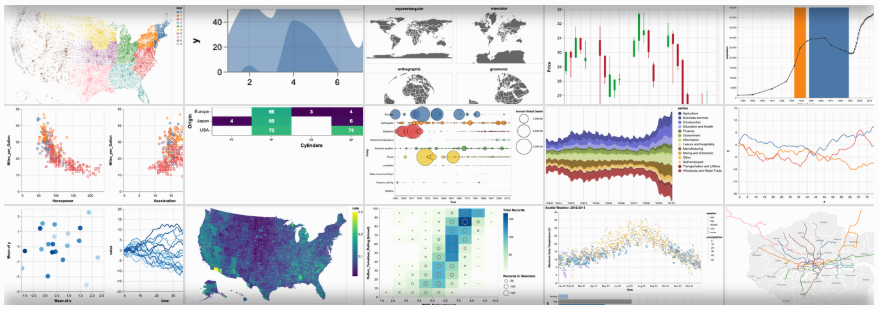

Doc: https://altair-viz.github.io/

## **3.1 Cheat Sheet**

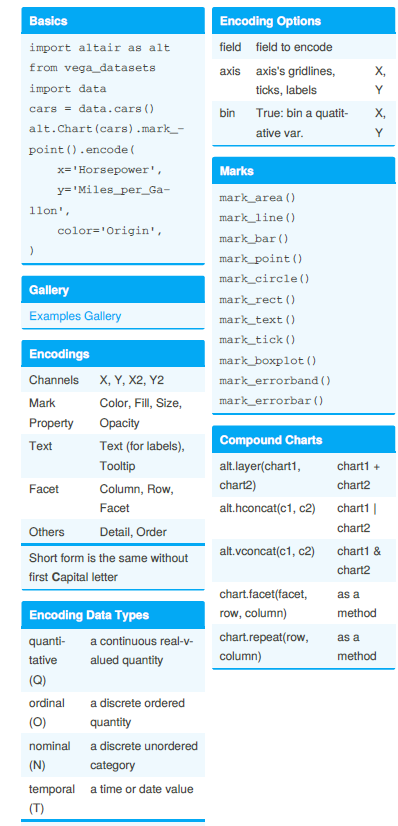

In [24]:
# imports
import altair as alt
alt.renderers.enable('default')

RendererRegistry.enable('default')

## **3.2 Basic Plots**

#### **3.2.1 Scatter Plot**

In [29]:
# ALTAIR - Scatter plot - Interactive
alt.Chart(iris).mark_circle().encode(
    x='petalLength', 
    y='sepalLength'
).interactive()

alt.Chart(...)

In [25]:
# ALTAIR - Scatter plot by group
alt.Chart(iris).mark_circle().encode(
    x='petalLength', 
    y='sepalLength', 
    color='species'
).interactive()

alt.Chart(...)

In [31]:
# ALTAIR - Scatter plot by group with facets
alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    width=180,
    height=180
).facet(
    column='species:N'
).interactive()

alt.FacetChart(...)

In [32]:
alt.Chart(cars).mark_point().encode(
    x='mpg',
    y='horsepower',
    color='acceleration'
).interactive()

alt.Chart(...)

In [34]:
alt.Chart(cars).mark_point().encode(
    x='mpg',
    y='horsepower',
    color='cylinders:O'
).interactive()

alt.Chart(...)

#### **3.2.2 Bar chart**

In [35]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('mpg', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='country',
    column='country'
).interactive()

alt.Chart(...)

#### **3.2.3 Line chart**

In [36]:
alt.Chart(cars).mark_line().encode(
    x='model_year',
    y='mean(mpg)'
)

alt.Chart(...)

In [37]:
alt.Chart(cars).mark_area().encode(
    x='model_year',
    y='ci0(mpg)',
    y2='ci1(mpg)'
)

alt.Chart(...)

In [38]:
import vega_datasets
from vega_datasets import data
sp500 = pd.read_csv(data.sp500.url)

brush = alt.selection(type='interval', encodings=['x'])

upper = alt.Chart(sp500).mark_area().encode(
    x=alt.X('date:T', scale = {'domain': brush.ref()}),
    y='price:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    height=60
).add_selection(brush)

alt.vconcat(upper, lower)

## other dataset (cars)

alt.VConcatChart(...)

## **3.3 Advanced Plots**

#### **3.3.1 Histogram**

In [39]:
alt.Chart(cars).mark_bar().encode(
    alt.X('mpg', bin=True),
    alt.Y('count()'),
    alt.Color('country')
)

alt.Chart(...)

#### **3.3.2 Count plot**

In [40]:
# ALTAIR - Scatter/bar chart - Interactions
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='petalLength:Q',
    y='sepalLength:Q',
    color=alt.condition(brush, 'species:N', alt.value('lightgray'))
).add_selection(
    brush
).interactive()

bars = alt.Chart().mark_bar().encode(
    y='species:N',
    color='species:N',
    x='count(species):Q'
).transform_filter(
    brush
).interactive()

alt.vconcat(points, bars, data=iris)

alt.VConcatChart(...)

## **3.4 Exercises**

**Exercise 1**

Make a scatter plot of the total_bill vs tip and group by day of week. [tips]

In [41]:
alt.Chart(tips).mark_point().encode(
    x='total_bill:Q',
    y='tip:Q',
    color='sex:N'
)

alt.Chart(...)

**Exercise 2**

To the previous plot, add a bar chart of count by gender next to it and make the selection from the scatter plot to the bar chart interactive. [tips]

In [42]:
brush = alt.selection(type='interval')

scatter = alt.Chart(tips).mark_point().encode(
    x='total_bill:Q',
    y='tip:Q',
    color='sex:N'
).add_selection(
    brush
)

bar = alt.Chart(tips).mark_bar().encode(
    x='sex:N',
    y='count():Q',
    color='sex:N'
).transform_filter(
    brush
)

scatter | bar

alt.HConcatChart(...)

# **4. BOKEH**

Description:
- Model objects are created in Python
- Then converted to a JSON format that is consumed by the client library, BokehJS
- Standalone HTML documents, or server-backed apps
- Easy usage from python (or Scala, or R, or...)

Strengths and Weaknesses:
- Strengths
    - Handles large datasets
    - Flexibility to customize charts
    - Multi-language support (Bokeh can convert Matplotlib, ggplot.py, and seaborn charts and plots)
- Weaknesses
    - Still a bit imperative: requires long specifications 
    - no 3D graphic functions
    - Before you construct any plot, you must first define the output mode, including notebook, server, and web browser modes.
    
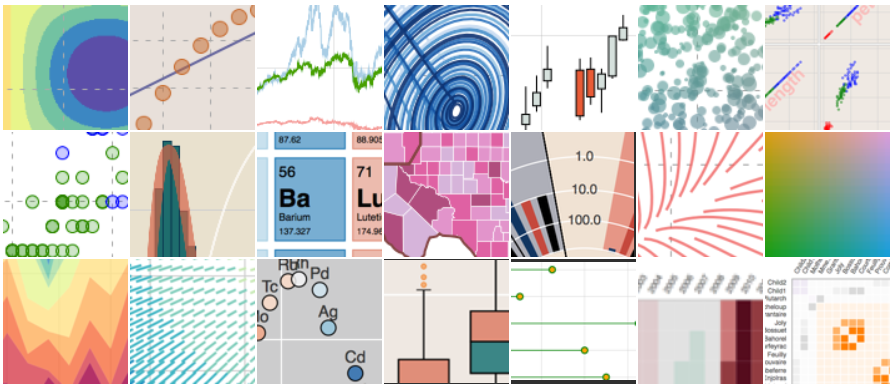

Doc: https://bokeh.pydata.org/en/latest/

In [26]:
from bokeh.io import output_notebook,output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.layouts import layout
from bokeh.models import ColumnDataSource, BoxAnnotation, Toggle, HoverTool, NumeralTickFormatter

output_notebook()


Loading BokehJS ...

## **4.1 Basic Plots**

The basic idea of Bokeh is a two-step process: First, you select from Bokeh’s building blocks to create your visualization. Second, you customize these building blocks to fit your needs.

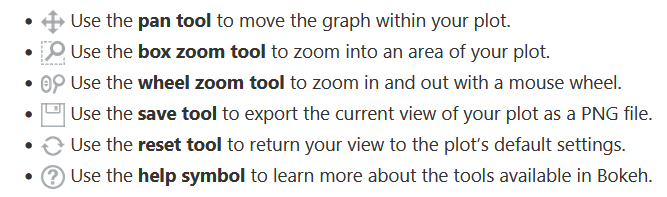

#### **4.1.1 Scatter Plot**

In [44]:
# create a new plot with a title and axis labels
p = figure(plot_width=400, plot_height=300, title = 'Scatter plot', x_axis_label='petalLength', y_axis_label='sepalLength')

# add a circle renderer
p.circle(x='petalLength', y='sepalLength', source=iris, size = 8, fill_alpha=0.5)

# show the results
show(p)

In [45]:
# BOKEH - Scatter plot by group
from bokeh.transform import factor_cmap

p = figure(plot_width=400, plot_height=300, title = "Petal Lengths vs. Sepal Lengths (cm)")
p.scatter('petalLength', 'sepalLength', source=iris, legend_label="species", fill_alpha=0.4, size=8,
          color=factor_cmap('species', 'Category10_3', iris.species.unique()))
p.legend.location = "top_left"
show(p)

In [46]:
# BOKEH - Scatter plot by group with facets
from bokeh.layouts import row

s_0 = figure(plot_width=200, plot_height=200, title=None)
s_0.circle(iris.petalLength, iris.sepalLength, size=5, color="navy", alpha=0.5)

p = [s_0]
for species, group in iris.groupby('species'):
    # by sharing the same ranges, we also share the panning with all plots
    s = figure(plot_width=200, plot_height=200, title=None, x_range=s_0.x_range, y_range=s_0.y_range)
    s.circle(group.petalLength, group.sepalLength, size=5, color="navy", alpha=0.5)
    p.append(s)

show(row(p))

In [47]:
# BOKEH - Interactions - Linking plots
from bokeh.layouts import gridplot

# has to be used for interactionhttps://bokeh.org/s
source = ColumnDataSource(data=iris)

tools = ["box_select", "hover", "reset"]

p_0 = figure(plot_height=300, plot_width=300, tools=tools)
p_0.circle(x="petalLength", y="sepalLength", size=8, hover_color="red", source=source, alpha=0.6,
           color=factor_cmap('species', 'Category10_3', iris.species.unique()), nonselection_color = 'gray')

p_1 = figure(plot_height=300, plot_width=300, tools=tools)
p_1.circle(x="petalWidth", y="sepalWidth", size=8, hover_color="red", source=source, alpha=0.6,
           color=factor_cmap('species', 'Category10_3', iris.species.unique()), nonselection_color = 'gray')

show(gridplot([[p_0, p_1]]))

In [48]:
# BOKEH - Interactions - Interactive legends
from bokeh.palettes import Spectral4
from bokeh.layouts import row

p = figure(plot_width=400, plot_height=400, title=None)
for (species, group), color in zip(iris.groupby('species'), Spectral4):
    p.circle(group.petalLength, group.sepalLength, size=5, color=color, legend_label=species)

p.legend.location = "top_left"
p.legend.click_policy="hide" 

show(row(p))

#### **4.1.2 Line chart**

In [49]:
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

p = figure(title = 'Line chart')

p.circle(x, y, legend_label="sin(x)")
p.line(x, y, legend_label="sin(x)")

p.line(x, 2*y, legend_label="2*sin(x)",
       line_dash=[4, 4], line_color="orange", line_width=2)

p.square(x, 3*y, legend_label="3*sin(x)", fill_color=None, line_color="green")
p.line(x, 3*y, legend_label="3*sin(x)", line_color="green")

p.legend.location = "bottom_left"
p.legend.title = 'Legend'
p.legend.title_text_font_style = "bold"
p.legend.title_text_font_size = "20px"
p.legend.background_fill_color = "grey"
p.legend.background_fill_alpha = 0.5

show(p)

## **4.2 Advanced plots**

#### **4.2.1 Widgets**

In [50]:
# BOKEH - Interactions - Adding widgets (using JavaScript Callbacks)
# (Widgets can either work with JavascriptCcallbacks or with Bokeh Server)
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show

output_file("js_on_change.html")

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.change.emit();
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)

#### **4.2.2 Hover**

In [52]:
#Hover 

x, y = weather_2016['Formatted Date'], weather_2016['Temperature (C)']

# Basic plot setup
plot = figure(width=600, height=300, x_axis_type="datetime", tools="",
              toolbar_location=None, title='Hover over points')

plot.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = plot.circle(x, y, size=20,
                fill_color="grey", hover_fill_color="firebrick",
                fill_alpha=0.05, hover_alpha=0.3,
                line_color=None, hover_line_color="white")

plot.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(plot)

#### **4.2.3 Buttons and boxes**

In [53]:
#Buttons and boxes

from bokeh.io import output_file, show
from bokeh.layouts import layout
from bokeh.models import BoxAnnotation, Toggle
from bokeh.plotting import figure 

curdoc().theme = 'caliber'

p = figure(width=600, height=200, tools='')
p.line([1, 2, 3], [1, 2, 1], line_color="#0072B2")
pink_line = p.line([1, 2, 3], [2, 1, 2], line_color="#CC79A7")

green_box = BoxAnnotation(left=1.5, right=2.5, fill_color='#009E73', fill_alpha=0.1)
p.add_layout(green_box)

# Use js_link to connect button active property to glyph visible property

toggle1 = Toggle(label="Green Box", button_type="success", active=True)
toggle1.js_link('active', green_box, 'visible')

toggle2 = Toggle(label="Pink Line", button_type="success", active=True)
toggle2.js_link('active', pink_line, 'visible')

show(layout([p], [toggle1, toggle2]))

#### **Aestethics**

In [54]:
# Theme 
x = [1, 2, 3, 4, 5]
y = [6, 7, 6, 4, 5]

curdoc().theme = 'dark_minimal' #others are :  caliber, light_minimal, night_sky, and contrast.

p = figure(title='dark_minimal', width=300, height=300)
p.line(x, y)

show(p)

In [55]:
#Background, border
p = figure(title='Beige background, grey border and blue border', width=300, height=300)
p.line(x, y)
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

p.border_fill_color = "whitesmoke"
p.min_border_left = 50

p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

show(p)

In [56]:
#Axis
from math import pi

curdoc().theme = 'caliber'
p = figure(width=400, height=400)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

p.xaxis.ticker = [2, 3.5, 4] #The only x axis variables you want to see

#p.xaxis[0].formatter = NumeralTickFormatter(format="0.0%")
#p.yaxis[0].formatter = NumeralTickFormatter(format="$0.00")

p.xaxis.major_label_orientation = pi/4
p.yaxis.major_label_orientation = "vertical"


show(p)